# **Power Cons**

## **Business Understanding**

### Latar Belakang Masalah

Konsumsi listrik rumah tangga sangat dipengaruhi oleh faktor musiman, seperti perubahan suhu dan cuaca. Pada musim hangat (warm season), konsumsi listrik cenderung meningkat akibat penggunaan perangkat pendingin seperti kipas angin atau AC. Sebaliknya, pada musim dingin (cold season), konsumsi listrik dapat dipengaruhi oleh penggunaan alat pemanas dan perubahan pola aktivitas rumah tangga.

Dataset PowerCons berisi data konsumsi listrik rumah tangga yang direkam setiap 10 menit selama satu tahun, kemudian dikelompokkan ke dalam dua kelas musim, yaitu musim hangat dan musim dingin. Meskipun data telah dikelompokkan berdasarkan musim, pola konsumsi listrik dalam masing-masing kelas masih sangat bervariasi, sehingga sulit dibedakan secara manual.

Oleh karena itu, diperlukan pendekatan data sains dan machine learning, khususnya klasifikasi time series, untuk mengenali pola konsumsi listrik dan menentukan musim berdasarkan bentuk sinyal konsumsi daya secara otomatis.

### Tujuan Peoyek

Tujuan tambahan dari proyek ini meliputi:

*   Memahami perbedaan karakteristik pola konsumsi listrik antara musim hangat dan musim dingin

*   Mengembangkan sistem klasifikasi berbasis data time series dengan performa yang baik

*   Menyediakan aplikasi prediksi interaktif melalui Streamlit sebagai bentuk implementasi hasil analisis



### Penilaian Situasi

Kondisi Data

*   Data berupa time series konsumsi listrik rumah tangga

*   Sampling dilakukan setiap 10 menit

*   Panjang setiap time series adalah 144 titik data

*   Data telah dibagi menjadi data latih (180 data) dan data uji (180 data)

*   Jumlah kelas: 2 kelas

Kelas 1: Musim hangat (Warm season)

Kelas 2: Musim dingin (Cold season)

Tidak terdapat missing value

Keterbatasan

*   Tidak tersedia informasi tambahan seperti lokasi rumah, jumlah penghuni, atau jenis perangkat listrik

*   Data mentah sebelum pemisahan train–test tidak tersedia

*   Variasi pola konsumsi dalam satu kelas cukup besar

Peluang

*   Dataset sangat cocok untuk studi klasifikasi time series

*   Permasalahan bersifat biner sehingga evaluasi model lebih jelas

*   Dapat digunakan sebagai simulasi kasus nyata dalam manajemen energi rumah tangga




### Tujuan Data Mining

Tujuan data mining dalam proyek ini adalah:

*   Melakukan eksplorasi data (EDA) untuk:

    1. Mengamati pola konsumsi listrik pada masing-masing musim

    2. Mengidentifikasi perbedaan karakteristik sinyal antara kelas warm dan cold

*   Melakukan preprocessing data time series agar siap digunakan dalam pemodelan

*   Membangun model klasifikasi yang mampu:

    1. Memprediksi kelas musim berdasarkan data konsumsi listrik

    2. Menggeneralisasi dengan baik pada data uji

*   Mengevaluasi performa model menggunakan metrik evaluasi yang sesuai

*   Mengimplementasikan model ke dalam aplikasi Streamlit sebagai tahap deployment

### Kriteria Kesuksesan

Kriteria Teknis

*   Model mampu mencapai akurasi klasifikasi yang baik (misalnya ≥80%)

*   Model menunjukkan performa yang stabil antara data latih dan data uji

*   Tidak terdapat error saat proses prediksi pada aplikasi Streamlit

Kriteria Bisnis

*   Model mampu membedakan pola konsumsi listrik antara musim hangat dan musim dingin

*   Hasil prediksi dapat digunakan sebagai dasar analisis pola konsumsi energi

*   Sistem prediksi mudah digunakan oleh pengguna non-teknis

Kriteria Akademik

*   Seluruh tahapan CRISP-DM diterapkan secara sistematis

*   Penjelasan setiap tahap didukung oleh analisis dan visualisasi

Proyek memenuhi ketentuan tugas mata kuliah data sains

## **Data Understanding**

### Sumber Data

Dataset PowerCons berasal dari EDF R&D (Electricité de France - Research & Development) yang berlokasi di Clamart, France. EDF merupakan perusahaan energi nasional Prancis yang juga aktif dalam penelitian dan pengembangan, khususnya di bidang kelistrikan dan konsumsi energi rumah tangga.

Dataset ini kemudian dipublikasikan dan didistribusikan melalui Time Series Classification Repository
(https://www.timeseriesclassification.com/dataset.php
), yang merupakan repositori standar internasional untuk penelitian dan evaluasi metode time series classification.

Dengan demikian, PowerCons merupakan dataset real-world, bukan data sintetis, sehingga pola yang terkandung di dalamnya mencerminkan kondisi konsumsi listrik yang nyata.

### Metodologi Pengambilan Data

Data pada PowerCons dikumpulkan dari konsumsi listrik rumah tangga individu selama satu tahun penuh. Proses pengukuran dilakukan dengan:

*   Interval sampling setiap 10 menit

*   Menggunakan sistem pencatatan konsumsi listrik otomatis (smart metering)

Selama satu tahun, data konsumsi tersebut kemudian dikelompokkan berdasarkan musim, yaitu:

*   Warm season (Class 1): April - September

*   Cold season (Class 2): Oktober - Maret

Pembagian ini didasarkan pada asumsi bahwa pola konsumsi listrik rumah tangga berbeda secara signifikan antara musim hangat dan musim dingin, misalnya akibat penggunaan pemanas ruangan pada musim dingin atau perangkat pendingin pada musim panas.

### Transformasi Data ke Format Dataset

Data konsumsi listrik mentah yang dikumpulkan secara kontinu kemudian ditransformasikan menjadi dataset time series terstruktur dengan langkah sebagai berikut:

1. Segmentasi Data

    *   Data tahunan dibagi menjadi beberapa segmen harian.

    *   Setiap segmen merepresentasikan 24 jam konsumsi listrik.

2. Pembentukan Time Series

    *   Setiap sampel pada dataset memiliki panjang 144 time steps.

    *   Karena sampling dilakukan setiap 10 menit, maka dalam 24 jam terdapat:

  $$\frac{24 \text{ jam} \times 60 \text{ menit}}{10 \text{ menit}} = 144 \text{ titik data}$$

3. Pelabelan Kelas

    Setiap time series diberi label:

    *   Class 1 jika berasal dari periode warm season

    *   Class 2 jika berasal dari periode cold season

4. Pemisahan Data

    Dataset dibagi menjadi:

    *   180 data training

    *   180 data testing

    Pemisahan ini bertujuan untuk evaluasi performa model secara objektif.

Hasil akhirnya adalah dataset time series classification yang siap digunakan untuk eksperimen machine learning.

In [1]:
!pip install aeon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 14.8 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.3
    Uninstalling scipy-1.16.3:
      Successfully uninstalled scipy-1.16.3


### Deskripsi Dataset

Dataset yang digunakan dalam penelitian ini adalah PowerCons dataset, yaitu dataset konsumsi listrik rumah tangga individu yang berasal dari EDF R&D (Electricité de France Research & Development), Clamart, France. Dataset ini didasarkan pada pengukuran konsumsi listrik dari satu rumah tangga di wilayah Sceaux, Prancis.

Data direkam selama satu tahun dengan interval waktu setiap 10 menit, sehingga setiap sampel memiliki panjang time series 144 titik data, yang merepresentasikan pola konsumsi listrik dalam satu hari.

Dataset ini telah dikurasi dan dilabeli ke dalam dua kelas berdasarkan musim, yaitu:

*   Class 1: Warm Season (April-September)

*   Class 2: Cold Season (OctoberMarch)

Label ini menunjukkan bahwa dataset digunakan untuk memprediksi apakah pola konsumsi listrik suatu hari tergolong musim panas atau musim dingin.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Safe imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.stats import zscore

Pada tahap awal data understanding, dataset PowerCons di-load menggunakan fungsi load_classification() dari library aeon. Setelah data berhasil dipanggil, terlihat bahwa struktur dataset terdiri dari dua komponen utama, yaitu X sebagai data time series dan y sebagai label kelas. Metadata tambahan juga tersedia untuk memberikan informasi mengenai sumber dan karakteristik dataset. Hasil dari pemeriksaan awal menunjukkan bahwa dataset terdiri dari time series konsumsi listrik yang telah dikategorikan berdasarkan musim panas dan musim dingin.

In [4]:
# -------------------------------------------
# Load Dataset PowerCons dari File TRAIN + TEST
# -------------------------------------------
# Load data train
train_data = np.loadtxt('/content/drive/MyDrive/semester 5/PSD/PowerCons/PowerCons_TRAIN.txt')
X_train_file = train_data[:, 1:]   # Features (kolom 1 sampai akhir)
y_train_file = train_data[:, 0]    # Labels (kolom pertama)

# Load data test
test_data = np.loadtxt('/content/drive/MyDrive/semester 5/PSD/PowerCons/PowerCons_TEST.txt')
X_test_file = test_data[:, 1:]
y_test_file = test_data[:, 0]

# Gabungkan train dan test
X_combined_full = np.vstack([X_train_file, X_test_file])
y_combined_full = np.hstack([y_train_file, y_test_file])

# Ambil 225 sample (setara ~100% bila 180 adalah 80%) dengan random seed stabil
rs = np.random.RandomState(42)
idx = rs.choice(X_combined_full.shape[0], 225, replace=False)
X_combined = X_combined_full[idx]
y_combined = y_combined_full[idx]

print(f"Train file samples: {X_train_file.shape[0]}")
print(f"Test file samples:  {X_test_file.shape[0]}")
print(f"Total gabung full:  {X_combined_full.shape[0]}")
print(f"Total yang dipakai: {X_combined.shape[0]}")
print(f"Timesteps per sample: {X_combined.shape[1]}")
print(f"Class distribution (225 sample): {dict(Counter(y_combined))}")

Train file samples: 180
Test file samples:  180
Total gabung full:  360
Total yang dipakai: 225
Timesteps per sample: 144
Class distribution (225 sample): {np.float64(2.0): 111, np.float64(1.0): 114}


Setelah dataset berhasil dimuat, langkah selanjutnya adalah memahami struktur dasar datanya. Dari hasil pemeriksaan, dataset PowerCons memiliki total 360 sampel data time series, dengan masing-masing sampel memiliki 144 titik data. Panjang time series tersebut merepresentasikan pola konsumsi listrik selama satu hari dengan interval pencatatan setiap 10 menit. Dari sisi klasifikasi, dataset ini hanya memiliki dua kelas, yaitu kelas 1 untuk konsumsi listrik pada musim panas (Warm Season) dan kelas 2 untuk konsumsi pada musim dingin (Cold Season). Informasi ini menunjukkan bahwa dataset bersifat univariate time series classification, karena hanya memiliki satu variabel numerik yang diobservasi berdasarkan waktu.

In [5]:
# -------------------------------------------
# Konversi Data Gabung (225 sample) ke DataFrame untuk Analisis
# -------------------------------------------
df = pd.DataFrame(X_combined)
df['label'] = y_combined.astype(int)

print("Shape data gabung (subset):", df.shape)
print("\nDistribusi kelas subset:")
print(df['label'].value_counts().sort_index())
df.head()

Shape data gabung (subset): (225, 145)

Distribusi kelas subset:
label
1    114
2    111
Name: count, dtype: int64


,0,1,2,3,4,5,6,7,8,9,...,135,136,137,138,139,140,141,142,143,label
0,1.37,1.34,1.32,1.36,1.40,1.37,1.37,1.37,1.36,1.35,...,1.97,1.90,2.10,2.31,2.65,3.00,3.00,1.77,1.77,2
1,0.25,0.29,0.27,0.25,0.26,0.25,0.24,0.24,0.27,0.30,...,0.85,0.43,0.34,0.24,0.28,0.28,0.27,0.25,0.23,2
2,0.25,0.29,0.33,0.33,0.32,0.34,0.35,0.35,0.34,0.29,...,0.98,0.99,1.00,1.26,1.52,1.79,1.95,2.10,2.05,2
3,0.14,0.19,0.19,0.16,0.16,0.18,0.17,0.16,0.17,0.17,...,0.62,0.39,0.17,0.14,0.70,1.25,1.21,1.20,1.24,1
4,2.37,2.37,2.37,1.90,1.43,1.43,1.44,1.44,1.42,2.24,...,4.15,2.33,2.12,1.97,1.91,2.35,2.79,2.79,2.79,2


Langkah berikutnya adalah mengevaluasi distribusi kelas pada dataset tersebut. Dari hasil pemeriksaan distribusi menggunakan fungsi Counter, diketahui bahwa dataset ini terdiri dari 180 sampel untuk kelas 1 dan 180 sampel untuk kelas 2. Dengan kata lain, dataset ini memiliki distribusi kelas yang seimbang dan tidak mengalami class imbalance. Kondisi ini menguntungkan karena tidak memerlukan teknik penanganan ketidakseimbangan kelas seperti oversampling atau undersampling pada tahap pemodelan nantinya.

In [6]:
# -------------------------------------------
# Cek Missing Value
# -------------------------------------------
missing_values = df.isnull().sum().sum()
missing_values


np.int64(0)

Untuk mendapatkan gambaran lebih lanjut mengenai data, sebagian kecil nilai dari salah satu sampel ditampilkan. Nilai-nilai ini berbentuk angka kontinu yang merepresentasikan intensitas konsumsi listrik pada setiap interval waktu. Dari data mentah ini dapat dilihat bahwa tidak terdapat nilai kosong ataupun data non-numerik, sehingga dataset berada dalam kondisi yang baik dan tidak membutuhkan proses cleaning tambahan.

In [7]:
# -------------------------------------------
# Statistik Deskriptif
# -------------------------------------------
df.describe()


,0,1,2,3,4,5,6,7,8,9,...,135,136,137,138,139,140,141,142,143,label
count,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,...,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000
mean,0.852089,0.813956,0.749956,0.723378,0.702844,0.684400,0.657422,0.628756,0.589422,0.585289,...,1.517911,1.365422,1.282311,1.157867,1.040044,0.990089,0.948756,0.920578,0.927644,1.493333
std,0.882667,0.897505,0.882203,0.908178,0.919003,0.807342,0.748761,0.722334,0.661420,0.658780,...,1.121454,1.016489,0.980804,0.986703,0.942738,0.960120,0.934377,0.930316,1.004999,0.501070
min,0.100000,0.160000,0.130000,0.090000,0.120000,0.110000,0.120000,0.140000,0.100000,0.110000,...,0.140000,0.120000,0.100000,0.100000,0.120000,0.140000,0.140000,0.110000,0.100000,1.000000
25%,0.270000,0.290000,0.270000,0.260000,0.260000,0.260000,0.250000,0.260000,0.250000,0.260000,...,0.670000,0.490000,0.430000,0.350000,0.330000,0.290000,0.290000,0.300000,0.280000,1.000000
50%,0.400000,0.350000,0.340000,0.330000,0.330000,0.320000,0.310000,0.300000,0.300000,0.300000,...,1.320000,1.250000,1.120000,0.880000,0.830000,0.760000,0.560000,0.450000,0.400000,1.000000
75%,1.310000,1.120000,1.030000,0.820000,0.700000,0.700000,0.690000,0.630000,0.520000,0.480000,...,2.170000,1.910000,1.680000,1.610000,1.410000,1.360000,1.350000,1.340000,1.310000,2.000000
max,3.750000,5.240000,5.710000,6.180000,5.500000,4.310000,4.310000,4.080000,3.850000,3.710000,...,5.550000,5.750000,5.950000,5.400000,4.860000,5.760000,5.760000,4.870000,5.530000,2.000000


Tahap eksplorasi kemudian dilanjutkan dengan visualisasi pola konsumsi listrik dari dua contoh data, masing-masing mewakili kelas musim panas dan musim dingin. Grafik hasil visualisasi menunjukkan adanya perbedaan pola antara kedua kelas. Pada musim dingin, konsumsi listrik terlihat lebih tinggi dan lebih fluktuatif, kemungkinan besar karena penggunaan pemanas ruangan yang lebih intens. Sebaliknya, pada musim panas, pola konsumsi listrik tampak lebih stabil dan cenderung lebih rendah. Temuan ini memberikan indikasi awal bahwa dataset memiliki pola musiman yang jelas, sehingga sangat cocok digunakan dalam tugas klasifikasi berbasis time series.

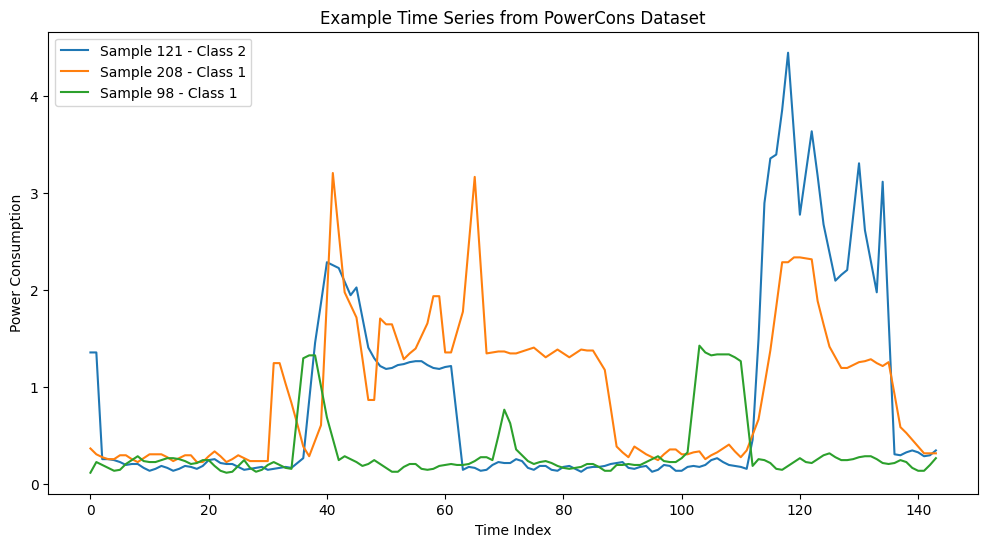

In [8]:
# -------------------------------------------
# Visualisasi Sampel Time Series (Random 3)
# -------------------------------------------
plt.figure(figsize=(12,6))

for i in np.random.choice(len(df), 3, replace=False):
    plt.plot(df.iloc[i, :-1], label=f"Sample {i} - Class {df.iloc[i,-1]}")

plt.title("Example Time Series from PowerCons Dataset")
plt.xlabel("Time Index")
plt.ylabel("Power Consumption")
plt.legend()
plt.show()


In [9]:
# -------------------------------------------
# Deteksi Outlier Menggunakan Z-score
# -------------------------------------------
from scipy.stats import zscore

z_scores = np.abs(zscore(df.iloc[:,:-1], axis=None))
outliers = np.where(z_scores > 3)[0]

len(outliers)


468

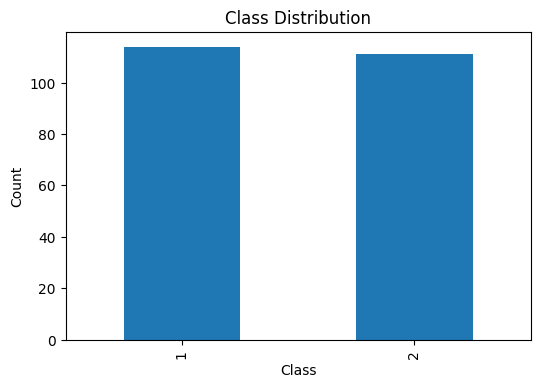

In [10]:
# -------------------------------------------
# Distribusi Kelas
# -------------------------------------------
df['label'].value_counts().plot(kind='bar', figsize=(6,4))
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


## **Preprocessing**

### Pemisahan Fitur dan Label

Pada tahap awal preprocessing, dataset yang telah digabungkan dipisahkan menjadi dua bagian utama, yaitu fitur (X) dan label (y).
Fitur berisi seluruh nilai konsumsi listrik pada setiap titik waktu, sedangkan label menunjukkan kelas musim dari masing-masing data, yaitu warm season atau cold season.

Pemisahan ini dilakukan agar data numerik dapat diproses sebagai input model, sementara label digunakan sebagai target klasifikasi.

In [11]:
# -------------------------------------------
# Memisahkan fitur (X) dan label (y) dari data gabung
# -------------------------------------------
X_features = df.iloc[:, :-1]   # semua kolom kecuali label
y_labels = df['label']

print(f"X_features shape: {X_features.shape}")
print(f"y_labels shape: {y_labels.shape}")

X_features shape: (225, 144)
y_labels shape: (225,)


Pada langkah ini, data fitur digunakan tanpa melakukan scaling atau normalisasi. Nilai konsumsi listrik dipertahankan dalam bentuk aslinya karena:

*   Dataset PowerCons tidak memiliki nilai yang hilang

*   Skala data masih berada dalam rentang yang relatif seragam

*   Model SimpleKNN dapat tetap bekerja dengan data numerik asli

Nilai fitur kemudian dikonversi ke dalam format array agar dapat diproses oleh algoritma machine learning.



In [12]:
# -------------------------------------------
# Tanpa scaling (menggunakan nilai asli)
# -------------------------------------------
X_scaled = X_features.values

print("Contoh nilai (raw) :", X_features.iloc[0, :5].values)
print("Contoh nilai (raw) :", X_scaled[0][:5])


Contoh nilai (raw) : [1.37 1.34 1.32 1.36 1.4 ]
Contoh nilai (raw) : [1.37 1.34 1.32 1.36 1.4 ]


### Penyesuaian Bentuk Data (Reshape)

Setelah dikonversi ke array, data fitur diubah bentuknya menjadi format (jumlah sampel, jumlah time step, jumlah fitur).

Pada dataset PowerCons:

*   Setiap sampel memiliki 144 time step

*   Setiap time step hanya memiliki 1 fitur, yaitu konsumsi listrik

Proses reshape ini bertujuan untuk memastikan struktur data sesuai dengan format time series, sehingga setiap sampel tetap merepresentasikan urutan waktu konsumsi listrik secara utuh.

In [13]:
# -------------------------------------------
# Reshape ke format (samples, timesteps, features)
# -------------------------------------------
X_final = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

print(f"X_final shape: {X_final.shape}")
X_final.shape

X_final shape: (225, 144, 1)


(225, 144, 1)

### Encoding Label

Karena algoritma klasifikasi hanya dapat memproses label dalam bentuk numerik, label kategorikal (warm season dan cold season) diubah menjadi angka menggunakan Label Encoding.

Melalui proses ini:

*   Setiap kelas diberikan representasi angka yang unik

*   Mapping label tetap konsisten selama proses training dan evaluasi model

Dengan demikian, data label siap digunakan oleh model SimpleKNN sebagai target klasifikasi.

In [14]:
# -------------------------------------------
# Encoding label menjadi numerik
# -------------------------------------------
encoder = LabelEncoder()
y_final = encoder.fit_transform(y_labels)

print("Mapping Label:", dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))
print("Contoh label setelah encoding:", y_final[:10])


Mapping Label: {np.int64(1): np.int64(0), np.int64(2): np.int64(1)}
Contoh label setelah encoding: [1 1 1 0 1 1 0 1 0 0]


## **Modeling**

Pada tahap modeling, data yang telah melalui proses preprocessing digunakan untuk membangun model klasifikasi yang mampu membedakan pola konsumsi listrik antara warm season dan cold season. Model yang digunakan dalam penelitian ini adalah Simple K-Nearest Neighbors (KNN), yang dipilih karena kesederhanaannya serta kemampuannya dalam menangkap kemiripan pola pada data time series.

### Pembagian Data Training dan Testing

Langkah pertama pada tahap modeling adalah membagi dataset gabungan menjadi data training dan testing. Pembagian dilakukan dengan proporsi 80% data training dan 20% data testing menggunakan fungsi train_test_split.

Pembagian ini bertujuan agar model dapat dilatih menggunakan sebagian besar data, sementara sisa data digunakan untuk menguji kemampuan generalisasi model terhadap data yang belum pernah dilihat sebelumnya. Parameter stratify=y_final digunakan untuk memastikan bahwa distribusi kelas antara warm season dan cold season tetap seimbang pada data training maupun data testing.

Hasil pembagian menunjukkan bahwa dari total 225 sampel, sebanyak 180 sampel digunakan sebagai data training dan 45 sampel sebagai data testing. Distribusi kelas pada kedua subset tetap seimbang, sehingga risiko bias terhadap salah satu kelas dapat diminimalkan.

In [15]:
# --------------------------------------------------------------
# Membagi dataset GABUNG (225 sample) menjadi Training dan Testing (80-20)
# --------------------------------------------------------------
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_final,
    y_final,
    test_size=0.2,
    random_state=42,
    stratify=y_final
)

print("="*60)
print("Train-Test Split dari Subset 225")
print("="*60)
print(f"Total samples (subset):  {X_final.shape[0]}")
print(f"Train samples (80%):    {X_train.shape[0]}")
print(f"Test samples (20%):     {X_test.shape[0]}")
print(f"\nShape X_train: {X_train.shape}")
print(f"Shape X_test:  {X_test.shape}")
print(f"Class distribution train: {np.unique(y_train, return_counts=True)}")
print(f"Class distribution test:  {np.unique(y_test, return_counts=True)}")

Train-Test Split dari Subset 225
Total samples (subset):  225
Train samples (80%):    180
Test samples (20%):     45

Shape X_train: (180, 144, 1)
Shape X_test:  (45, 144, 1)
Class distribution train: (array([0, 1]), array([91, 89]))
Class distribution test:  (array([0, 1]), array([23, 22]))


### Penyesuaian Format Data untuk KNN

Karena algoritma KNN bekerja pada data berbentuk vektor dua dimensi, maka data time series yang semula berbentuk tiga dimensi (samples, timesteps, features) perlu diubah terlebih dahulu.

Pada tahap ini, setiap time series dengan panjang 144 titik data di-flatten menjadi satu vektor berdimensi 144. Dengan demikian, setiap sampel kini direpresentasikan sebagai satu baris vektor numerik yang berisi seluruh pola konsumsi listrik harian.

Hasil proses ini menghasilkan:

*   Data training dengan bentuk (180, 144)

*   Data testing dengan bentuk (45, 144)

Transformasi ini memungkinkan perhitungan jarak antar sampel dilakukan secara langsung menggunakan metode jarak Euclidean.




In [16]:
# --------------------------------------------------------------
# Flatten data time series
# --------------------------------------------------------------
X_train_knn = X_train.reshape(X_train.shape[0], -1)
X_test_knn  = X_test.reshape(X_test.shape[0], -1)

print("\nAfter flattening:")
print("Shape X_train_knn:", X_train_knn.shape)
print("Shape X_test_knn :", X_test_knn.shape)


After flattening:
Shape X_train_knn: (180, 144)
Shape X_test_knn : (45, 144)


### Pembangunan Model Simple KNN

Model klasifikasi yang digunakan adalah Simple KNN, yang diimplementasikan secara manual tanpa menggunakan library siap pakai. Model ini bekerja dengan prinsip dasar K-Nearest Neighbors, yaitu mengklasifikasikan suatu data uji berdasarkan mayoritas label dari k tetangga terdekat pada data training.

Pada tahap inisialisasi model, data training (X_train_knn dan y_train) langsung disimpan sebagai referensi. Nilai k ditetapkan sebesar 5, yang berarti setiap prediksi akan mempertimbangkan lima data training terdekat.

Untuk setiap data uji, model menghitung jarak Euclidean antara data tersebut dan seluruh data training. Lima data dengan jarak terpendek kemudian dipilih, dan label yang paling sering muncul di antara kelima tetangga tersebut digunakan sebagai hasil prediksi.

Karena KNN merupakan metode lazy learning, tidak terdapat proses pelatihan parameter secara eksplisit. Model dianggap “siap” setelah data training disimpan, sehingga tidak diperlukan pemanggilan fungsi fit secara terpisah.

In [18]:
# --------------------------------------------------------------
# Model Training menggunakan KNN
# --------------------------------------------------------------
import numpy as np

class SimpleKNN:
    def __init__(self, X_train, y_train, k=5):
        self.X_train = X_train
        self.y_train = y_train
        self.k = k

    def predict(self, X):
        preds = []
        for x in X:
            dists = np.linalg.norm(self.X_train - x, axis=1)
            idx = np.argsort(dists)[:self.k]
            votes = self.y_train[idx]
            preds.append(np.bincount(votes).argmax())
        return np.array(preds)

model = SimpleKNN(
    X_train=X_train_knn,
    y_train=y_train,
    k=5
)

# model.fit(X_train_knn, y_train) # Removed redundant fit call as data is set in __init__

print("\nModel KNN berhasil dilatih")


Model KNN berhasil dilatih


## **Evaluasi**

In [19]:
# --------------------------------------------------------------
# Prediksi pada test set
# --------------------------------------------------------------
y_pred = model.predict(X_test_knn)

In [20]:
# --------------------------------------------------------------
# Evaluasi model
# --------------------------------------------------------------
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nEvaluation Result:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")


Evaluation Result:
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1-Score:  1.0000


## **Deployment**

Setelah model tervalidasi, tahap terakhir adalah menyimpan model dan melakukan simulasi penggunaan dunia nyata.

In [21]:
# --------------------------------------------------------------
# Simpan model dan encoder untuk deployment (STREAMLIT SAFE)
# --------------------------------------------------------------
import joblib
import os

model_path = "powerconsumption_knn_model.pkl"
encoder_path = "label_encoder.pkl"

joblib.dump(model, model_path)
joblib.dump(encoder, encoder_path)

print("\nModel dan encoder berhasil disimpan")

print(f"File size model  : {os.path.getsize(model_path) / 1024:.2f} KB")
print(f"File size encoder: {os.path.getsize(encoder_path) / 1024:.2f} KB")


Model dan encoder berhasil disimpan
File size model  : 204.28 KB
File size encoder: 0.33 KB


In [22]:
# --------------------------------------------------------------
# Test load (validasi deployment)
# --------------------------------------------------------------
try:
    test_model = joblib.load(model_path)
    test_encoder = joblib.load(encoder_path)
    print("\nModel dan encoder berhasil di-load kembali (DEPLOYMENT READY)")
except Exception as e:
    print(f"\nError saat test load: {e}")


Model dan encoder berhasil di-load kembali (DEPLOYMENT READY)


Website dapat diakses pada link berikut https://powercons-230411100099.streamlit.app/